In [1]:
# Import all the important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the Excel file
file = 'Adidas US Sales Datasets.xlsx'

# Loading the sheet names
excel_file = pd.ExcelFile(file)
sheet_names = excel_file.sheet_names
sheet_names

['Data Sales Adidas']

In [2]:
# Load the data from the sheet 'Data Sales Adidas'
data_sales_adidas = pd.read_excel(excel_file, sheet_name='Data Sales Adidas')

# Display the first few rows of the dataframe to understand its structure
data_sales_adidas

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


In [3]:
# Display the first few rows of the dataframe to understand its structure
data_sales_adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [4]:
# Datatype
data_sales_adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [5]:
# Summary statistics
summary_stats = data_sales_adidas.describe(include='all')

# Summary statistics values output
summary_stats

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
count,9648,9.648000e+03,9648,9648,9648,9648,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648
unique,6,NaN,NaN,5,50,52,6,NaN,NaN,NaN,NaN,NaN,3
top,Foot Locker,NaN,NaN,West,California,Portland,Men's Street Footwear,NaN,NaN,NaN,NaN,NaN,Online
freq,2637,NaN,NaN,2448,432,360,1610,NaN,NaN,NaN,NaN,NaN,4889
mean,NaN,1.173850e+06,2021-05-10 15:20:44.776119296,NaN,NaN,NaN,NaN,45.216625,256.930037,93273.437500,34425.244761,0.422991,NaN
min,NaN,1.128299e+06,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,7.000000,0.000000,0.000000,0.000000,0.100000,NaN
25%,NaN,1.185732e+06,2021-02-17 00:00:00,NaN,NaN,NaN,NaN,35.000000,106.000000,4254.500000,1921.752500,0.350000,NaN
50%,NaN,1.185732e+06,2021-06-04 00:00:00,NaN,NaN,NaN,NaN,45.000000,176.000000,9576.000000,4371.420000,0.410000,NaN
75%,NaN,1.185732e+06,2021-09-16 00:00:00,NaN,NaN,NaN,NaN,55.000000,350.000000,150000.000000,52062.500000,0.490000,NaN
max,NaN,1.197831e+06,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,110.000000,1275.000000,825000.000000,390000.000000,0.800000,NaN


In [6]:
# Check for missing values
missing_values = data_sales_adidas.isnull().sum()

# Summary missing values output
missing_values

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

/Users/mauriceneidhart/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


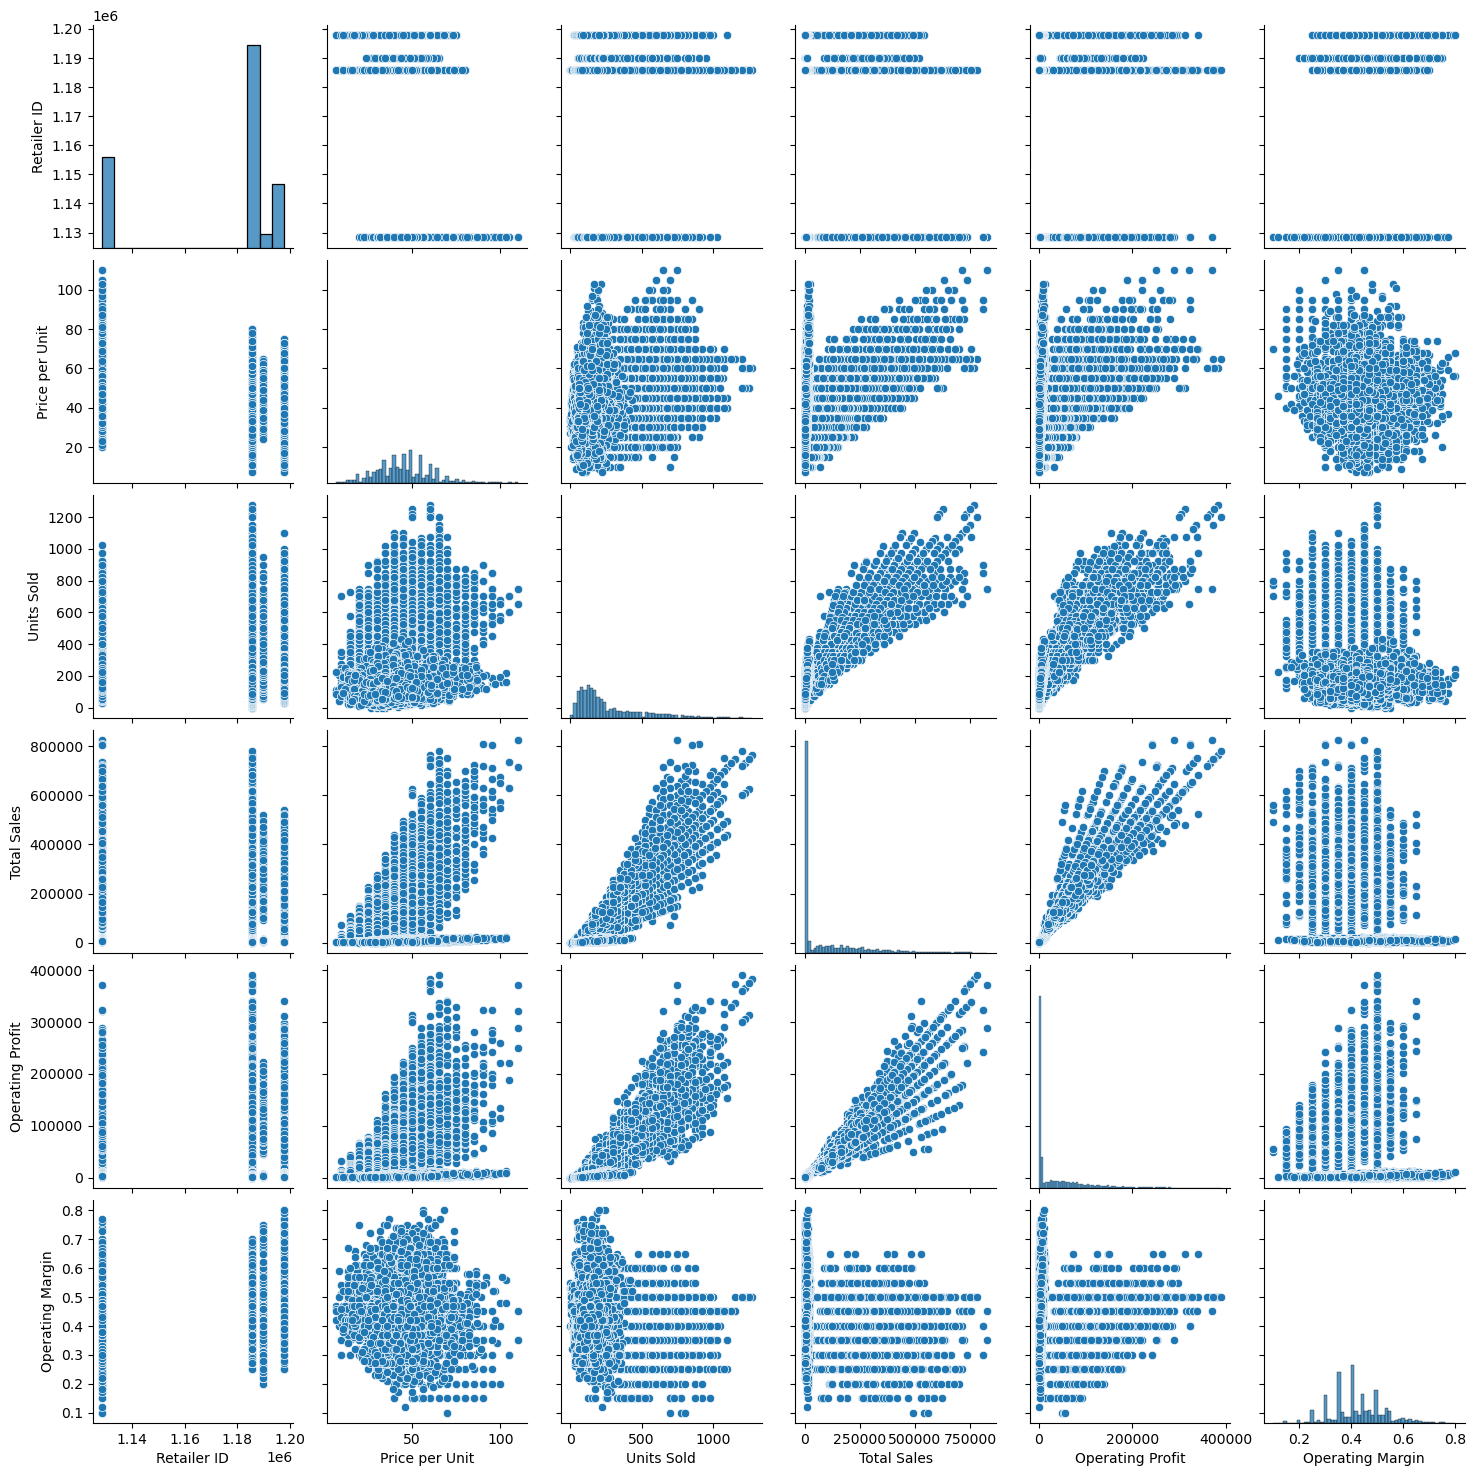

In [7]:
sns.pairplot(data_sales_adidas)
plt.show()

## Regressionsgerade - E6

In [8]:
y = data_sales_adidas['Total Sales']
x1 = data_sales_adidas['Operating Profit']

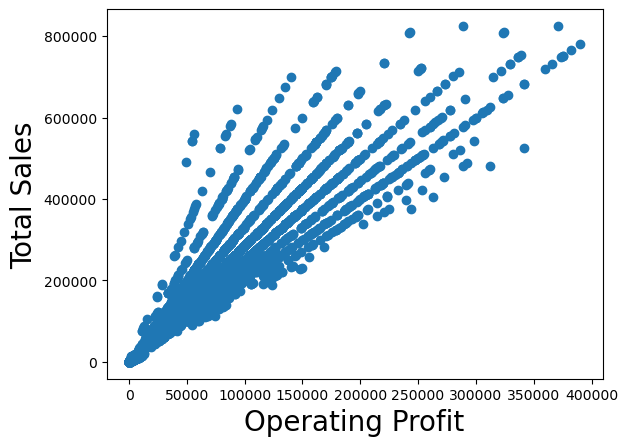

In [9]:
plt.scatter(x1,y)
plt.xlabel('Operating Profit', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.show()

In [10]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Sales   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 1.032e+05
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:20:48   Log-Likelihood:            -1.1628e+05
No. Observations:                9648   AIC:                         2.326e+05
Df Residuals:                    9646   BIC:                         2.326e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7062.5973    500.465     14.112      0.000    6081.581    8043.613
Operating Profit     2.5043      0.008    321.254      0.000       2.489       2.520
==============================================================================
Omnibus:                     5172.352   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           152619.459
Skew:                           2.007   Prob(JB):                         0.00
Kurtosis:                      22.067   Cond. No.                     7.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

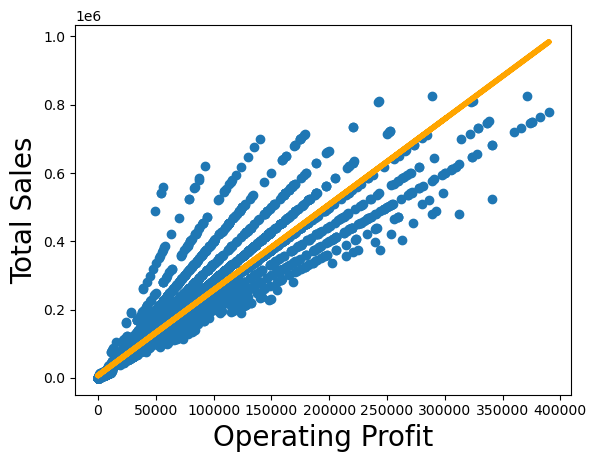

In [11]:
plt.scatter(x1,y)
yhat = 2.5043*x1 + 7062.5973
fig = plt.plot(x1,yhat,lw=4,c='orange', label='regression line')
plt.xlabel('Operating Profit', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.show()

## E7 - Preparing Data sets per Retailer

In [12]:
#Find link to the description of the function below
def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

data_footlocker = filter_rows_by_values(data_sales_adidas, "Retailer", ["Amazon","Kohl's", "Sports Direct", "Walmart", "West Gear"])
data_Amazon = filter_rows_by_values(data_sales_adidas, "Retailer", ["Foot Locker","Kohl's", "Sports Direct", "Walmart", "West Gear"])
#data_microsoft = filter_rows_by_values(raw_data, "Brand", ["Apple","IBM"])

In [13]:
data_footlocker

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


In [14]:
y = data_footlocker ['Price per Unit']
x1 = data_footlocker ['Operating Profit']
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Price per Unit   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     446.8
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           9.78e-92
Time:                        13:20:49   Log-Likelihood:                -10405.
No. Observations:                2637   AIC:                         2.081e+04
Df Residuals:                    2635   BIC:                         2.083e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               41.7037      0.284    146.837      0.000      41.147      42.261
Operating Profit     0.0001   4.76e-06     21.137      0.000    9.13e-05       0.000
==============================================================================
Omnibus:                      110.183   Durbin-Watson:                   0.489
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.660
Skew:                           0.461   Prob(JB):                     1.56e-29
Kurtosis:                       3.596   Cond. No.                     6.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
data_footlocker.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,2.637000e+03,2637,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000
mean,1.174993e+06,2021-05-23 17:04:58.976109312,44.784983,229.188093,83464.057641,30611.348051,0.417933
min,1.128299e+06,2020-01-01 00:00:00,9.000000,0.000000,0.000000,0.000000,0.150000
25%,1.185732e+06,2021-02-23 00:00:00,35.000000,80.000000,3427.000000,1504.800000,0.350000
50%,1.185732e+06,2021-06-18 00:00:00,45.000000,150.000000,9450.000000,4314.940000,0.400000
75%,1.185732e+06,2021-10-07 00:00:00,53.000000,300.000000,120000.000000,40500.000000,0.480000
max,1.197831e+06,2021-12-31 00:00:00,105.000000,1275.000000,765000.000000,382500.000000,0.700000
std,2.312664e+04,NaN,13.533961,216.477857,134053.600481,51194.484899,0.087968


In [16]:
data_Amazon.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,949.0,949,949.000000,949.000000,949.000000,949.000000,949.000000
mean,1185732.0,2021-07-16 04:04:17.955742976,48.759747,208.630137,81874.512118,30367.232150,0.417871
min,1185732.0,2021-01-13 00:00:00,19.000000,13.000000,416.000000,166.400000,0.250000
25%,1185732.0,2021-04-18 00:00:00,40.000000,84.000000,3808.000000,1661.920000,0.350000
50%,1185732.0,2021-07-20 00:00:00,50.000000,149.000000,7876.000000,3931.200000,0.400000
75%,1185732.0,2021-10-22 00:00:00,56.000000,275.000000,137500.000000,47250.000000,0.490000
max,1185732.0,2021-12-31 00:00:00,80.000000,900.000000,618750.000000,290625.000000,0.650000
std,0.0,NaN,11.832303,169.646546,113390.214535,44192.495075,0.084018


## Comparing Online to In-store and Outlet

In [17]:
#Find link to the description of the function below
def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

data_InStoreAndOutlet = filter_rows_by_values(data_sales_adidas, "Sales Method", ["Online"])
data_Online = filter_rows_by_values(data_sales_adidas, "Sales Method", ["In-store", "Outlet"])
data_InStore = filter_rows_by_values(data_sales_adidas, "Sales Method", ["Online", "Outlet"])
data_Outlet = filter_rows_by_values(data_sales_adidas, "Sales Method", ["Online", "In-store"])

In [18]:
data_InStoreAndOutlet.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,4.759000e+03,4759,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000
mean,1.172923e+06,2021-04-29 23:36:42.059256064,44.511242,323.548645,137051.742593,49501.909010,0.380706
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.128299e+06,2021-02-10 00:00:00,35.000000,150.000000,6450.000000,2658.480000,0.320000
50%,1.185732e+06,2021-05-21 00:00:00,45.000000,250.000000,82500.000000,28200.000000,0.380000
75%,1.185732e+06,2021-09-13 00:00:00,55.000000,450.000000,220000.000000,78000.000000,0.430000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.720000
std,2.688241e+04,NaN,14.896428,228.892639,157189.165498,59792.182047,0.087021


In [19]:
data_Online.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,4.889000e+03,4889,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000
mean,1.174752e+06,2021-05-21 00:16:47.322560768,45.903252,192.082839,50659.210882,19749.473608,0.464152
min,1.128299e+06,2020-01-01 00:00:00,9.000000,0.000000,0.000000,0.000000,0.210000
25%,1.185732e+06,2021-02-23 00:00:00,36.000000,81.000000,3290.000000,1566.040000,0.400000
50%,1.185732e+06,2021-06-11 00:00:00,46.000000,135.000000,6222.000000,2998.800000,0.470000
75%,1.185732e+06,2021-09-18 00:00:00,55.000000,218.000000,12954.000000,6553.840000,0.520000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1150.000000,825000.000000,341250.000000,0.800000
std,2.581292e+04,NaN,14.485596,176.269773,109613.825915,43353.516562,0.088536


In [20]:
data_InStore.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,1.740000e+03,1740,1740.000000,1740.000000,1740.000000,1740.000000,1740.000000
mean,1.172793e+06,2021-04-26 15:59:59.999999744,48.816092,396.545977,204967.672414,73328.326149,0.356121
min,1.128299e+06,2020-01-01 00:00:00,10.000000,25.000000,7500.000000,2625.000000,0.150000
25%,1.185732e+06,2021-02-08 00:00:00,40.000000,250.000000,96250.000000,32500.000000,0.300000
50%,1.185732e+06,2021-05-18 12:00:00,50.000000,350.000000,168750.000000,57750.000000,0.350000
75%,1.185732e+06,2021-09-10 00:00:00,60.000000,525.000000,276250.000000,94500.000000,0.400000
max,1.185732e+06,2021-12-23 00:00:00,110.000000,1250.000000,825000.000000,371250.000000,0.650000
std,2.400076e+04,NaN,15.594619,203.410458,144512.610591,56537.018518,0.070210


In [21]:
data_Outlet.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,3.019000e+03,3019,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000
mean,1.172998e+06,2021-05-01 21:29:45.094402304,42.030142,281.476648,97908.411063,35769.558622,0.394876
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.128299e+06,2021-02-10 00:00:00,33.000000,124.000000,4299.500000,1719.130000,0.350000
50%,1.185732e+06,2021-05-24 00:00:00,41.000000,200.000000,8820.000000,3654.000000,0.400000
75%,1.197831e+06,2021-09-17 00:00:00,50.000000,350.000000,161250.000000,56000.000000,0.450000
max,1.197831e+06,2021-12-31 00:00:00,100.000000,1275.000000,780000.000000,390000.000000,0.720000
std,2.841437e+04,NaN,13.887700,232.193750,150759.117450,57258.555000,0.092461


## E8

/var/folders/jw/j3m5x2m50xs8jdr7dg1t63600000gn/T/ipykernel_45742/1287796269.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_sales_adidas['Price per Unit'])


<Axes: xlabel='Price per Unit', ylabel='Density'>

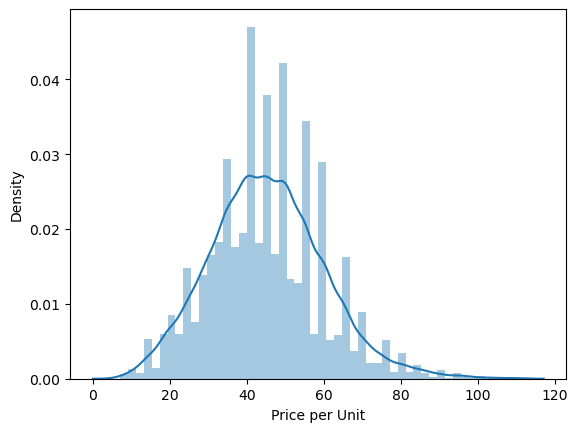

In [22]:
sns.distplot(data_sales_adidas['Price per Unit'])

In [23]:
# Einladen aller numerischer Attribute
numeric_data = data_sales_adidas.select_dtypes(include=[np.number])

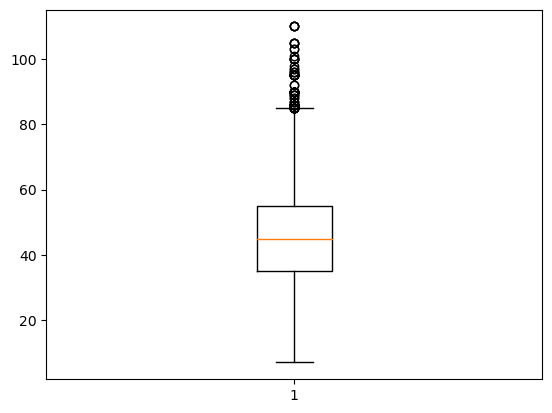

In [24]:
# Boxplot für TotalCharges erstellen, um sicherzustellen, dass keine Ausreißer vorhanden sind.
plt.boxplot(numeric_data["Price per Unit"])
plt.show()

Text(0.5, 1.0, 'Verteilung der verkauften Produkte')

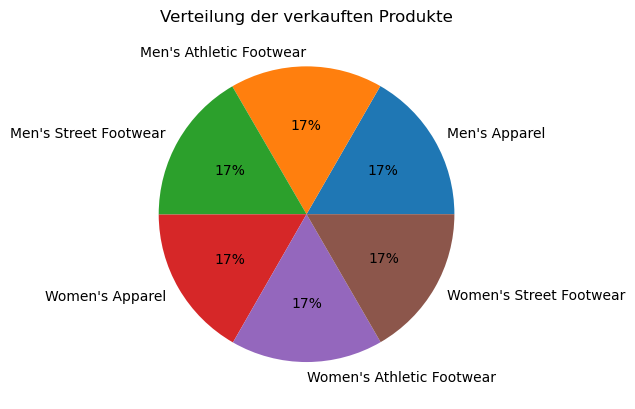

In [25]:
# Kuchendiagramm für Churn erzeugen
# Prozentuale Anteile generieren
churn_rate = data_sales_adidas.Product.value_counts() / len(data_sales_adidas.value_counts())

# Plot vorbereiten
labels = "Men's Apparel", "Men's Athletic Footwear", "Men's Street Footwear", "Women's Apparel", "Women's Athletic Footwear", "Women's Street Footwear"
fig, ax = plt.subplots()
ax.pie(churn_rate, labels=labels, autopct='%.f%%')  
ax.set_title('Verteilung der verkauften Produkte')

Text(0.5, 1.0, 'Verteilung der Retailer')

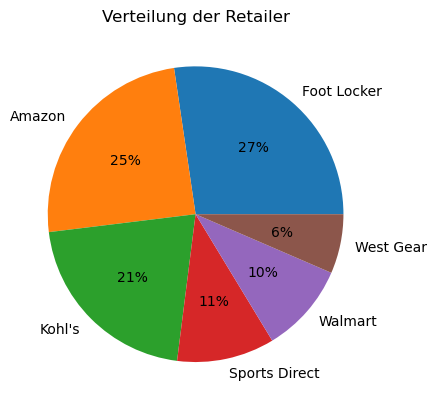

In [26]:
# Kuchendiagramm für Churn erzeugen
# Prozentuale Anteile generieren
churn_rate = data_sales_adidas.Retailer.value_counts() / len(data_sales_adidas.value_counts())

# Plot vorbereiten
#labels = "Men's Apparel", "Men's Athletic Footwear", "Men's Street Footwear", "Women's Apparel", "Women's Athletic Footwear", "Women's Street Footwear"
labels = "Foot Locker", "Amazon", "Kohl's", "Sports Direct", "Walmart", "West Gear"
fig, ax = plt.subplots()
ax.pie(churn_rate, labels=labels, autopct='%.f%%')  
ax.set_title('Verteilung der Retailer')

In [27]:
Top_prod = data_sales_adidas.groupby('Product').agg({"Units Sold" : "sum"}).sort_values(by = "Units Sold", ascending = False).reset_index()
Top_prod

,Product,Units Sold
0,Men's Street Footwear,593320
1,Men's Athletic Footwear,435526
2,Women's Apparel,433827
3,Women's Street Footwear,392269
4,Women's Athletic Footwear,317236
5,Men's Apparel,306683


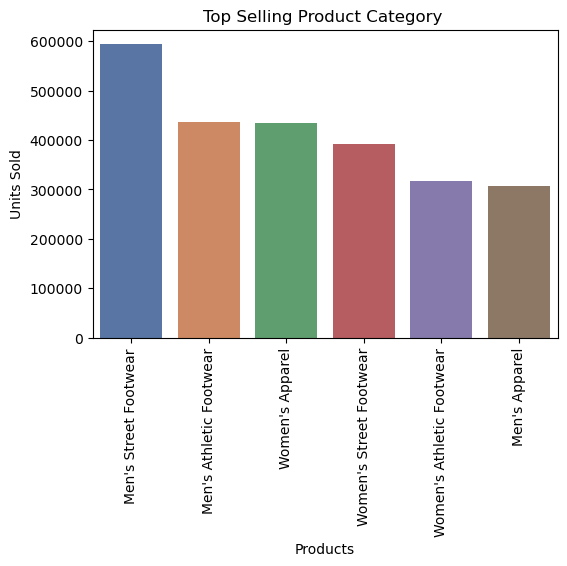

In [28]:
plt.figure(figsize=(6, 4))
sns.barplot(x=Top_prod["Product"], y=Top_prod["Units Sold"], palette = "deep")
plt.title('Top Selling Product Category ')
plt.xlabel('Products')
plt.ylabel('Units Sold')
plt.xticks(rotation = "vertical")
plt.show()

In [29]:
profit_by_retailer = data_sales_adidas.groupby('Retailer').agg({'Operating Profit' : "sum"}).reset_index().sort_values(by='Operating Profit', ascending=False)
profit_by_retailer

,Retailer,Operating Profit
5,West Gear,85667873.18
1,Foot Locker,80722124.81
3,Sports Direct,74332954.96
2,Kohl's,36811252.58
0,Amazon,28818503.31
4,Walmart,25782052.61


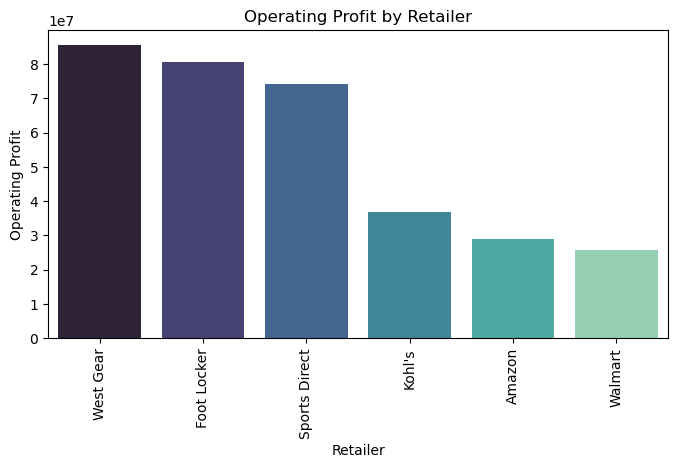

In [30]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Retailer', y='Operating Profit', data=profit_by_retailer,palette = "mako")
plt.title('Operating Profit by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Operating Profit')
plt.xticks(rotation="vertical")
plt.show()

In [37]:
data_sales_adidas['City_State'] = data_sales_adidas['City'] + ', ' + data_sales_adidas['State'] #Considering city names alone does not make sense, as some states have common city names

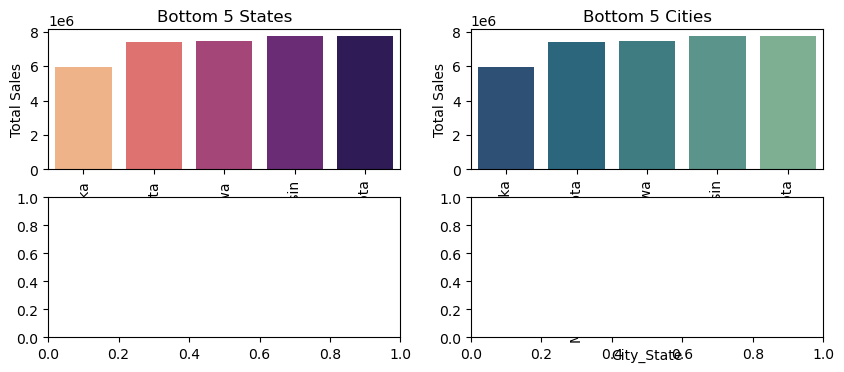

In [50]:
#top_states = data_sales_adidas.groupby('State')['Total Sales'].sum().nlargest(5).reset_index()
bottom_states = data_sales_adidas.groupby('State')['Total Sales'].sum().nsmallest(5).reset_index()

#top_cities = data_sales_adidas.groupby('City_State')['Total Sales'].sum().nlargest(5).reset_index()
bottom_cities = data_sales_adidas.groupby('City_State')['Total Sales'].sum().nsmallest(5).reset_index()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))

'''
sns.barplot(x='State', y='Total Sales', data=top_states,palette='magma', ax=axes[0, 0])
axes[0, 0].set_title('Top 5 States')
axes[0, 0].tick_params(axis='x', rotation=90)
'''
sns.barplot(x='State', y='Total Sales', data=bottom_states,palette='magma_r', ax=axes[0, 0])
axes[0, 0].set_title('Bottom 5 States')
axes[0, 0].tick_params(axis='x', rotation=90)
'''
sns.barplot(x='City_State', y='Total Sales', data=top_cities,palette='crest', ax=axes[1, 0])
axes[1, 0].set_title('Top 5 Cities')
axes[1, 0].tick_params(axis='x', rotation=90) 
'''
sns.barplot(x='City_State', y='Total Sales', data=bottom_cities, palette='crest_r' , ax=axes[0, 1])
axes[0, 1].set_title('Bottom 5 Cities')
axes[0, 1].tick_params(axis='x', rotation=90)

plt.show()

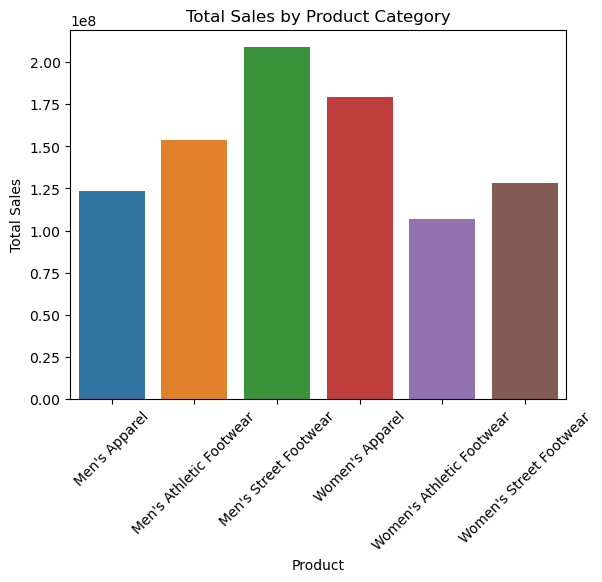

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by product category and sum the sales
sales_by_product = data_sales_adidas.groupby('Product')['Total Sales'].sum()

# Plotting
sns.barplot(x=sales_by_product.index, y=sales_by_product.values)
plt.xticks(rotation=45)
plt.title('Total Sales by Product Category')
plt.ylabel('Total Sales')
plt.show()


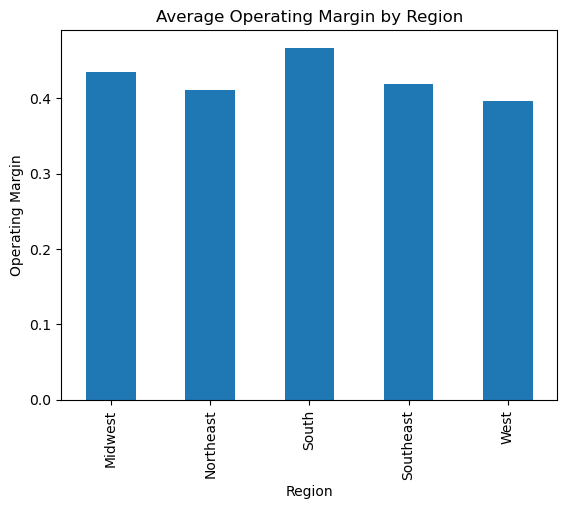

In [58]:
# Group data by region and calculate average margin
margin_by_region = data_sales_adidas.groupby('Region')['Operating Margin'].mean()

# Plotting
margin_by_region.plot(kind='bar')
plt.title('Average Operating Margin by Region')
plt.ylabel('Operating Margin')
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# For simplicity, let's assume we're predicting Total Sales based on Units Sold
X = data_sales_adidas[['Units Sold']]
y = data_sales_adidas['Total Sales']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))


Mean Squared Error: 2920347423.5949826


## ------

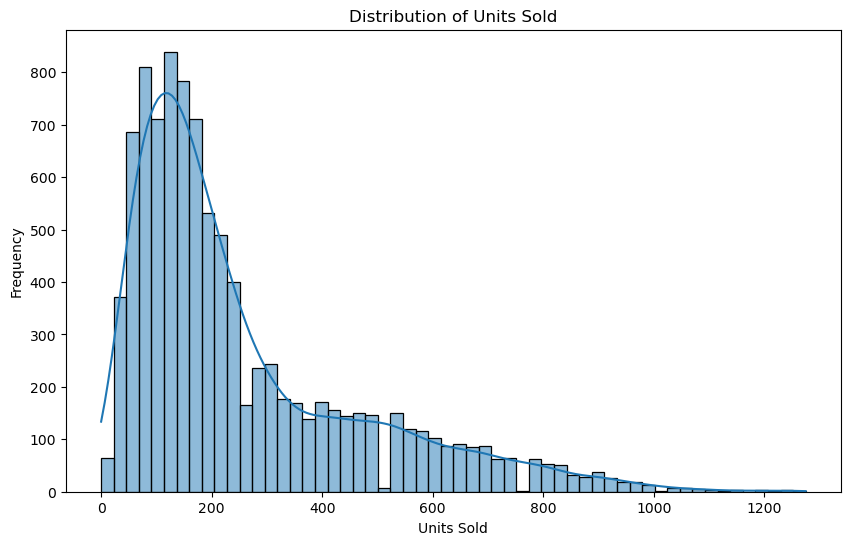

In [31]:
# Plotting distributions and relationships in the data
# Distribution of Units Sold
plt.figure(figsize=(10, 6))
sns.histplot(data_sales_adidas['Units Sold'], kde=True)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()

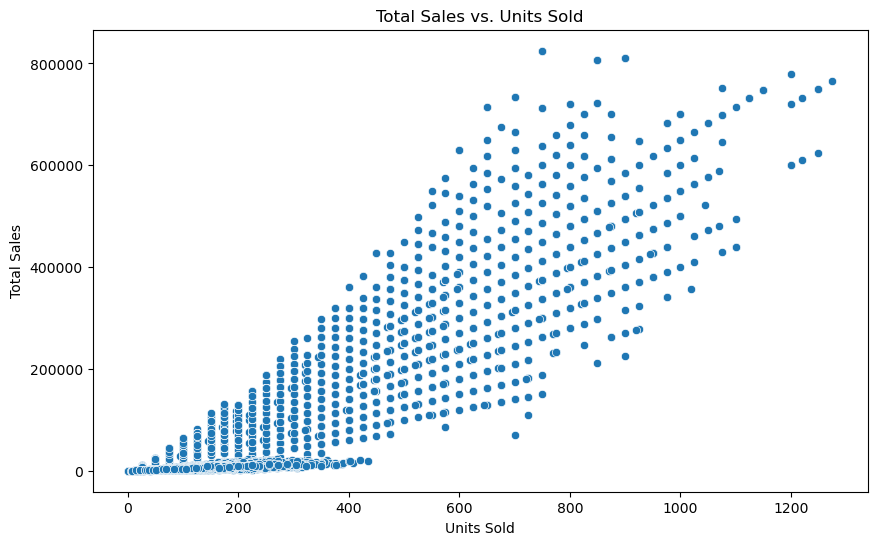

In [32]:
# Total Sales vs. Units Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_sales_adidas, x='Units Sold', y='Total Sales')
plt.title('Total Sales vs. Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Total Sales')
plt.show()

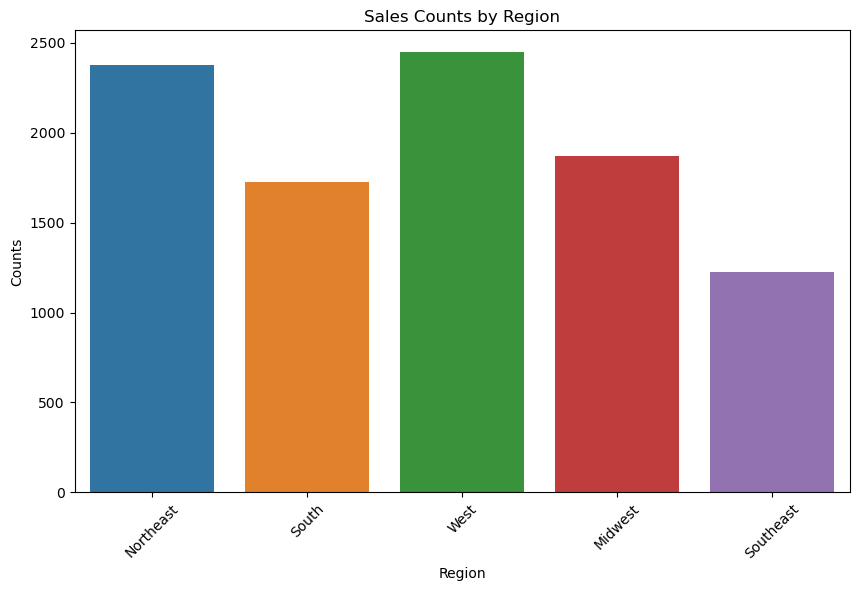

In [33]:
#Sales by Region
plt.figure(figsize=(10, 6))
sns.countplot(data=data_sales_adidas, x='Region')
plt.title('Sales Counts by Region')
plt.xlabel('Region')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

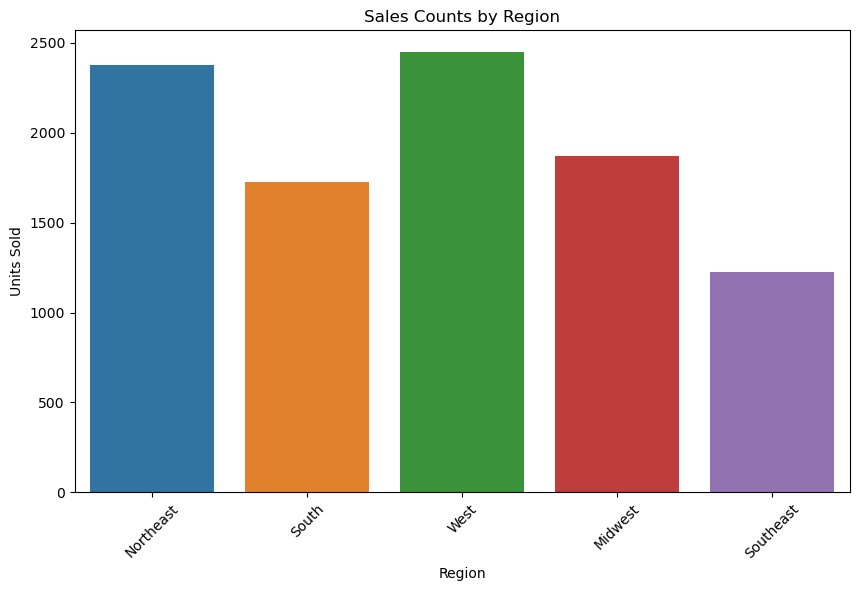

In [34]:
#Sales by Region
plt.figure(figsize=(10, 6))
sns.countplot(data=data_sales_adidas, x='Region')
plt.title('Sales Counts by Region')
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

In [35]:
# Gruppieren der Daten nach 'City' und Berechnen des durchschnittlichen 'Operating Margin' für jede Stadt
operating_margin_by_city = data_sales_adidas.groupby('Product')['Operating Margin'].mean().sort_values(ascending=False)

# Anzeigen der Städte mit den höchsten durchschnittlichen Betriebsmargen
top_cities_operating_margin = operating_margin_by_city.head()
print(top_cities_operating_margin)


Product
Men's Street Footwear        0.446130
Women's Apparel              0.441318
Women's Athletic Footwear    0.424359
Men's Apparel                0.413225
Women's Street Footwear      0.410199
Name: Operating Margin, dtype: float64


In [36]:
# Vorbereitung der Daten für die Zeitreihenanalyse
# Konvertierung des Datums in einen datetime-Typ und Setzen als Index
data_sales_adidas['Invoice Date'] = pd.to_datetime(data_sales_adidas['Invoice Date'])
data_sales_adidas.set_index('Invoice Date', inplace=True)

# Auswahl der Spalte 'Units Sold' für die Vorhersage von Verkaufstrends
data_for_prediction = data_sales_adidas['Units Sold']

# Umwandlung der Zeitreihe in ein überwachtes Lernformat
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        X.append(a)
        Y.append(dataset[i + look_back])
    return np.array(X), np.array(Y)

# Definieren der Anzahl der zurückzublickenden Tage
look_back = 3
X, Y = create_dataset(data_for_prediction, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Aufteilung in Trainings- und Testdaten
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size,:,:], X[train_size:len(X),:,:]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# LSTM-Modell für die Zeitreihenvorhersage
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training des Modells
model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=1)

# Vorhersage und Berechnung des Fehlers
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_score = np.sqrt(mean_squared_error(Y_train, train_predict[:,0]))
test_score = np.sqrt(mean_squared_error(Y_test, test_predict[:,0]))

train_score, test_score


Epoch 1/100
202/202 [==============================] - 1s 2ms/step - loss: 24580.7988
Epoch 2/100
202/202 [==============================] - 0s 2ms/step - loss: 11563.6592
Epoch 3/100
202/202 [==============================] - 0s 2ms/step - loss: 10151.0410
Epoch 4/100
202/202 [==============================] - 0s 2ms/step - loss: 10554.1172
Epoch 5/100
202/202 [==============================] - 0s 1ms/step - loss: 10286.9707
Epoch 6/100
202/202 [==============================] - 0s 2ms/step - loss: 10234.0049
Epoch 7/100
202/202 [==============================] - 0s 2ms/step - loss: 9441.4404
Epoch 8/100
202/202 [==============================] - 0s 2ms/step - loss: 9550.1191
Epoch 9/100
202/202 [==============================] - 0s 2ms/step - loss: 9462.2275
Epoch 10/100
202/202 [==============================] - 0s 1ms/step - loss: 9979.6172
Epoch 11/100
202/202 [==============================] - 0s 1ms/step - loss: 9491.7559
Epoch 12/100
202/202 [==============================] - 0

(99.94974453147302, 42.72134624742132)